In [1]:
from fastai.vision.all import *
from fastai.tabular.all import *


In [2]:
path = Path(os.getcwd())
path.ls()

(#10) [Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/.ipynb_checkpoints'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/Fastai-501-linear-model-and-neural-net-from-scratch.ipynb'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/Fastai-502-why-you-should-use-a-framework.ipynb'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/Fastai-506H_Titanic.ipynb'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/how-random-forests-really-work.ipynb'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/Kaggle-ICR'),Path('C:/Users/mgupta70.ASURITE/Dropbox (ASU)/ASU/PhD/Courses/Fast_ai/video_lectures/lec_05_NN_from_scratch/models'),Path('C:/Users/mg

In [3]:
Path.BASE_PATH = path
path.ls()

(#10) [Path('.ipynb_checkpoints'),Path('Fastai-501-linear-model-and-neural-net-from-scratch.ipynb'),Path('Fastai-502-why-you-should-use-a-framework.ipynb'),Path('Fastai-506H_Titanic.ipynb'),Path('how-random-forests-really-work.ipynb'),Path('Kaggle-ICR'),Path('models'),Path('sub.csv'),Path('test.csv'),Path('train.csv')]

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv(path/'train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling Missing values

### I - Embarked

In [11]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
# 1. How can their ticket number be same.
# 2. both have same ticket number, same cabin, same price, same sex,same class, and both SURVIVED

In [13]:
df[df['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
# Only these 2 were in the B28 cabin

In [22]:
if 11 in df['Ticket']:
    print(df[])

yay


In [27]:
df[df['Ticket'].astype(str).str.contains('1135')]
# may be they are from S or C

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [33]:
S_emb = df[df['Embarked']=='S']
S_cabin = S_emb[S_emb['Cabin'].notnull()]
S_cabin.Cabin.values

array(['C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'C52',
       'C83', 'F33', 'F G73', 'C23 C25 C27', 'E31', 'D26', 'C110', 'E101',
       'D26', 'D47', 'C123', 'F2', 'C2', 'E33', 'B19', 'F4', 'A32', 'F2',
       'G6', 'C93', 'C83', 'D35', 'G6', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'D7', 'A19', 'C22 C26', 'C106', 'C22 C26', 'C7',
       'D', 'C124', 'C91', 'C2', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128',
       'E33', 'B96 B98', 'G6', 'E10', 'C52', 'E44', 'B96 B98',
       'C23 C25 C27', 'A34', 'C104', 'E38', 'D21', 'E12', 'E63', 'A14',
       'C93', 'C30', 'C22 C26', 'B79', 'E25', 'D46', 'F33', 'B73', 'C95',
       'B38', 'B22', 'E67', 'C101', 'E25', 'E44', 'E68', 'C125', 'F4',
       'D19', 'D50', 'D9', 'A23', 'E58', 'C126', 'B71', 'B5', 'B20',
       'F G63', 'E24', 'E24', 'C124', 'C126', 'F G73', 'E101', 'E8', 'B5',
       'D45', 'C46', 'B22', 'D30', 'E121', 'B77', 'B96 B98', 'D11', 'E77',
       'B3', 'B20', 'D6', 'D17', 'B96 B98', 'A36', 'E8', 'B102', 'B6

In [37]:
from collections import Counter
S_cabin_types= [alphabet[0] for alphabet in S_cabin.Cabin.values]
Counter(S_cabin_types).keys()

dict_keys(['C', 'E', 'G', 'D', 'A', 'F', 'B', 'T'])

In [38]:
def get_cabin_classes(embarked = ['S','C','Q']):
    for emb_stn in embarked:
        print('Embarked: ',emb_stn)
        all_from_emb = df[df['Embarked']==emb_stn]
        cabin_ppl = all_from_emb[all_from_emb['Cabin'].notnull()]
        cabin_ppl.Cabin.values
        emb_cabin_types= [alphabet[0] for alphabet in cabin_ppl.Cabin.values]
        print(Counter(emb_cabin_types).keys())
        

In [39]:
get_cabin_classes(embarked = ['S','C','Q'])

Embarked:  S
dict_keys(['C', 'E', 'G', 'D', 'A', 'F', 'B', 'T'])
Embarked:  C
dict_keys(['C', 'B', 'D', 'A', 'F', 'E'])
Embarked:  Q
dict_keys(['C', 'E', 'F'])


In [40]:
# our embarked missing people seem to have embarked from either S or C
# ticket number also indicated the same
# BOth are traveling solo: so we cannot use name to do any kind of search
# Now we can only use price

In [44]:
S_fares = df.Fare[df['Embarked']=='S']
S_fares.describe()

count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: Fare, dtype: float64

In [45]:
C_fares = df.Fare[df['Embarked']=='C']
C_fares.describe()

count    168.000000
mean      59.954144
std       83.912994
min        4.012500
25%       13.697950
50%       29.700000
75%       78.500025
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'C')

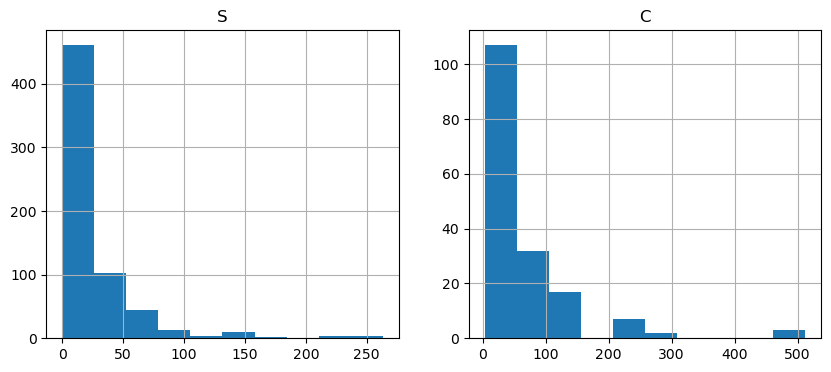

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
S_fares.hist()
plt.title('S')
plt.subplot(1,2,2)
C_fares.hist()
plt.title('C')

<AxesSubplot:title={'center':'Fare'}, xlabel='[Embarked]'>

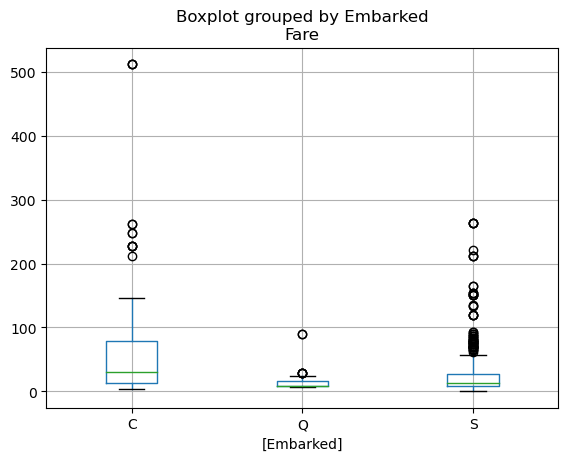

In [52]:
df.boxplot(column=['Fare'], by=['Embarked'])

In [53]:
# I should modify it to consider people who are class 1 

In [54]:
def get_cabin_classes(embarked = ['S','C','Q'], cons_pclass=True, cons_cabin=True):
    for emb_stn in embarked:
        print('Embarked: ',emb_stn)
        all_from_emb = df[df['Embarked']==emb_stn]
        if cons_pclass:
            print('Considering only Class 1 people from ', emb_stn)
            cabin_ppl = all_from_emb[all_from_emb['Pclass']==1]
            
        if cons_cabin:
            print('Considering people and w and w/o cabin ids from ', emb_stn)
            cabin_ppl = all_from_emb[all_from_emb['Cabin'].notnull()]
        else:
            print('Considering all CLass people and w and w/o cabin ids from ', emb_stn)
            cabin_ppl = all_from_emb
        emb_cabin_types= [alphabet[0] for alphabet in cabin_ppl.Cabin.values]
        print(Counter(emb_cabin_types).keys())
        

In [55]:
get_cabin_classes(embarked = ['S','C','Q'], cons_pclass=True, cons_cabin=True)

Embarked:  S
Considering only Class 1 people from  S
Considering people and w and w/o cabin ids from  S
dict_keys(['C', 'E', 'G', 'D', 'A', 'F', 'B', 'T'])
Embarked:  C
Considering only Class 1 people from  C
Considering people and w and w/o cabin ids from  C
dict_keys(['C', 'B', 'D', 'A', 'F', 'E'])
Embarked:  Q
Considering only Class 1 people from  Q
Considering people and w and w/o cabin ids from  Q
dict_keys(['C', 'E', 'F'])


In [62]:
S_fares_cl_1 = df[(df['Embarked'] == 'S') & (df['Pclass'] == 1)]
S_fares_cl_1.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,127.000000,127.000000,127.0,108.000000,127.000000,127.000000,127.000000
mean,477.842520,0.582677,1.0,38.152037,0.433071,0.393701,70.364862
std,249.989537,0.495070,0.0,15.315584,0.649671,0.757581,58.811278
min,4.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,273.500000,0.000000,1.0,28.000000,0.000000,0.000000,29.250000
50%,493.000000,1.000000,1.0,37.000000,0.000000,0.000000,52.000000
75%,698.500000,1.000000,1.0,48.000000,1.000000,0.500000,83.475000
max,888.000000,1.000000,1.0,80.000000,3.000000,4.000000,263.000000


In [63]:
C_fares_cl_1 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 1)]
C_fares_cl_1.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,85.00000,85.000000,85.0,74.000000,85.000000,85.000000,85.000000
mean,440.80000,0.694118,1.0,38.027027,0.376471,0.317647,104.718529
std,239.05114,0.463515,0.0,14.243454,0.533998,0.601818,99.093935
min,2.00000,0.000000,1.0,16.000000,0.000000,0.000000,26.550000
25%,274.00000,0.000000,1.0,25.000000,0.000000,0.000000,49.500000
50%,453.00000,1.000000,1.0,36.500000,0.000000,0.000000,78.266700
75%,633.00000,1.000000,1.0,49.000000,1.000000,0.000000,110.883300
max,890.00000,1.000000,1.0,71.000000,2.000000,2.000000,512.329200


In [64]:
# statistically: they boarded from C

In [70]:
df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [72]:
# assign
df.iloc[61,-1] = 'C'

In [73]:
df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         C
Name: 61, dtype: object

In [74]:
# repeat for other
df.iloc[829,-1] = 'C'

In [75]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:title={'center':'Pclass'}, xlabel='[Cabin]'>

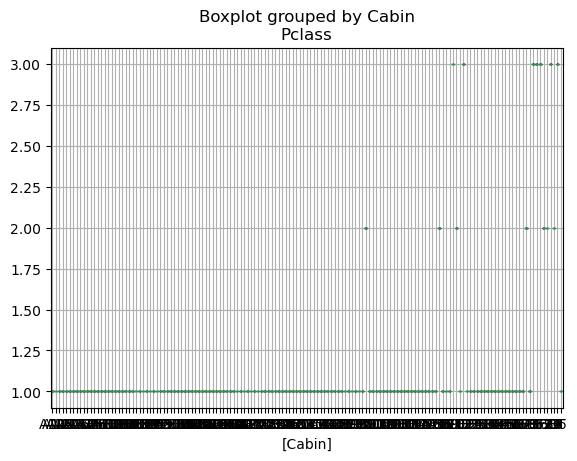

In [76]:
df.boxplot(column=['Pclass'], by=['Cabin'])

In [89]:
# cabin is a list with many unique values.

df['cabin_ids'] = [alphabet[0] for alphabet in df.Cabin.values.astype(str)]
df['cabin_ids'].unique()

In [91]:
df['cabin_ids'].replace('n','nan', inplace=True)

In [92]:
df['cabin_ids'].unique()

array(['nan', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:title={'center':'Pclass'}, xlabel='[cabin_ids]'>

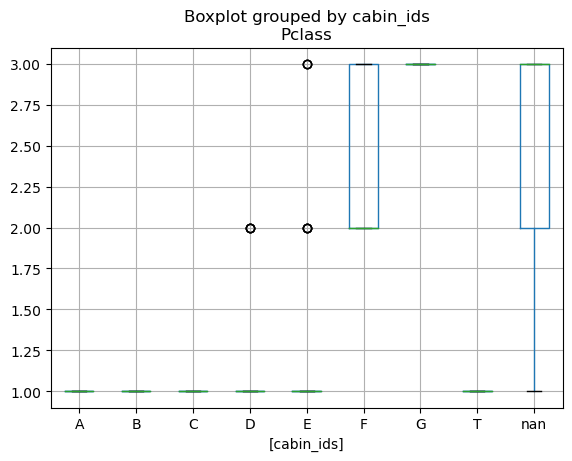

In [93]:
df.boxplot(column=['Pclass'], by=['cabin_ids'])

Text(0.5, 1.0, 'Pclass 3')

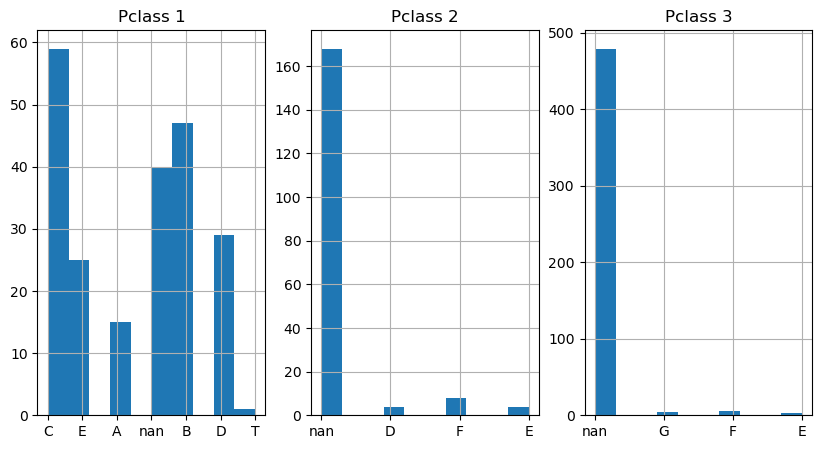

In [98]:

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
pclass_1 = df[df['Pclass']==1]
pclass_1_cabins = pclass_1['cabin_ids']
pclass_1_cabins.hist()
plt.title('Pclass 1')

plt.subplot(1,3,2)
pclass_2 = df[df['Pclass']==2]
pclass_2_cabins = pclass_2['cabin_ids']
pclass_2_cabins.hist()
plt.title('Pclass 2')

plt.subplot(1,3,3)
pclass_3 = df[df['Pclass']==3]
pclass_3_cabins = pclass_3['cabin_ids']
pclass_3_cabins.hist()
plt.title('Pclass 3')

In [ ]:
# class 1 - A,B,C,T [Common - D,E,]
# class 2 - F,E
# class 3 - F,E

In [101]:
# these people can be safely put into A,B, C class
df[(df['Cabin'].isnull())&(df['Pclass']==1) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_ids
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,nan
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,nan
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,nan
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,nan
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,nan
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,nan
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,nan
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,nan
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,nan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,nan


In [106]:
# these people may be  put into F, E class
df[(df['Cabin'].isnull())&((df['Pclass']==2)|(df['Pclass']==3))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_ids
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,nan
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,nan
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,nan
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,nan
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,nan
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,nan
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,nan
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,nan
